# Task 1

In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import mstats
from sklearn.model_selection import train_test_split
import numpy as np
import warnings

wine_df = pd.read_excel("wine.xlsx")
data_dictionary = pd.read_excel("DataDictionary_Wine.xlsx")

wine_df.head()


,INDEX,Purchase,Cases,STARS,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex
0,1,1,3,2,3.2,1.160,-0.98,54.2,-0.567,,268,0.99280,3.33,-0.59,9.9,0,8
1,2,1,3,3,4.5,0.160,-0.81,26.1,-0.425,15,-327,1.02792,3.38,0.7,,-1,7
2,4,1,5,3,7.1,2.640,-0.88,14.8,0.037,214,142,0.99518,3.12,0.48,22,-1,8
3,5,1,3,1,5.7,0.385,0.04,18.8,-0.425,22,115,0.99640,2.24,1.83,6.2,-1,6
4,6,1,4,2,8.0,0.330,-1.26,9.4,,-167,108,0.99457,3.12,1.77,13.7,0,9


In [19]:
numeric_columns = [
    "FixedAcidity", "VolatileAcidity", "CitricAcid", "ResidualSugar", 
    "Chlorides", "FreeSulfurDioxide", "TotalSulfurDioxide", "Density", 
    "pH", "Sulphates", "Alcohol"
]

# Convert to numeric and set errors='coerce' to convert invalid parsing to NaN
wine_df[numeric_columns] = wine_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for missing values in the dataset
missing_values = wine_df.isnull().sum()
missing_values

INDEX                    0
Purchase                 0
Cases                    0
STARS                    0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
dtype: int64

## Histograms

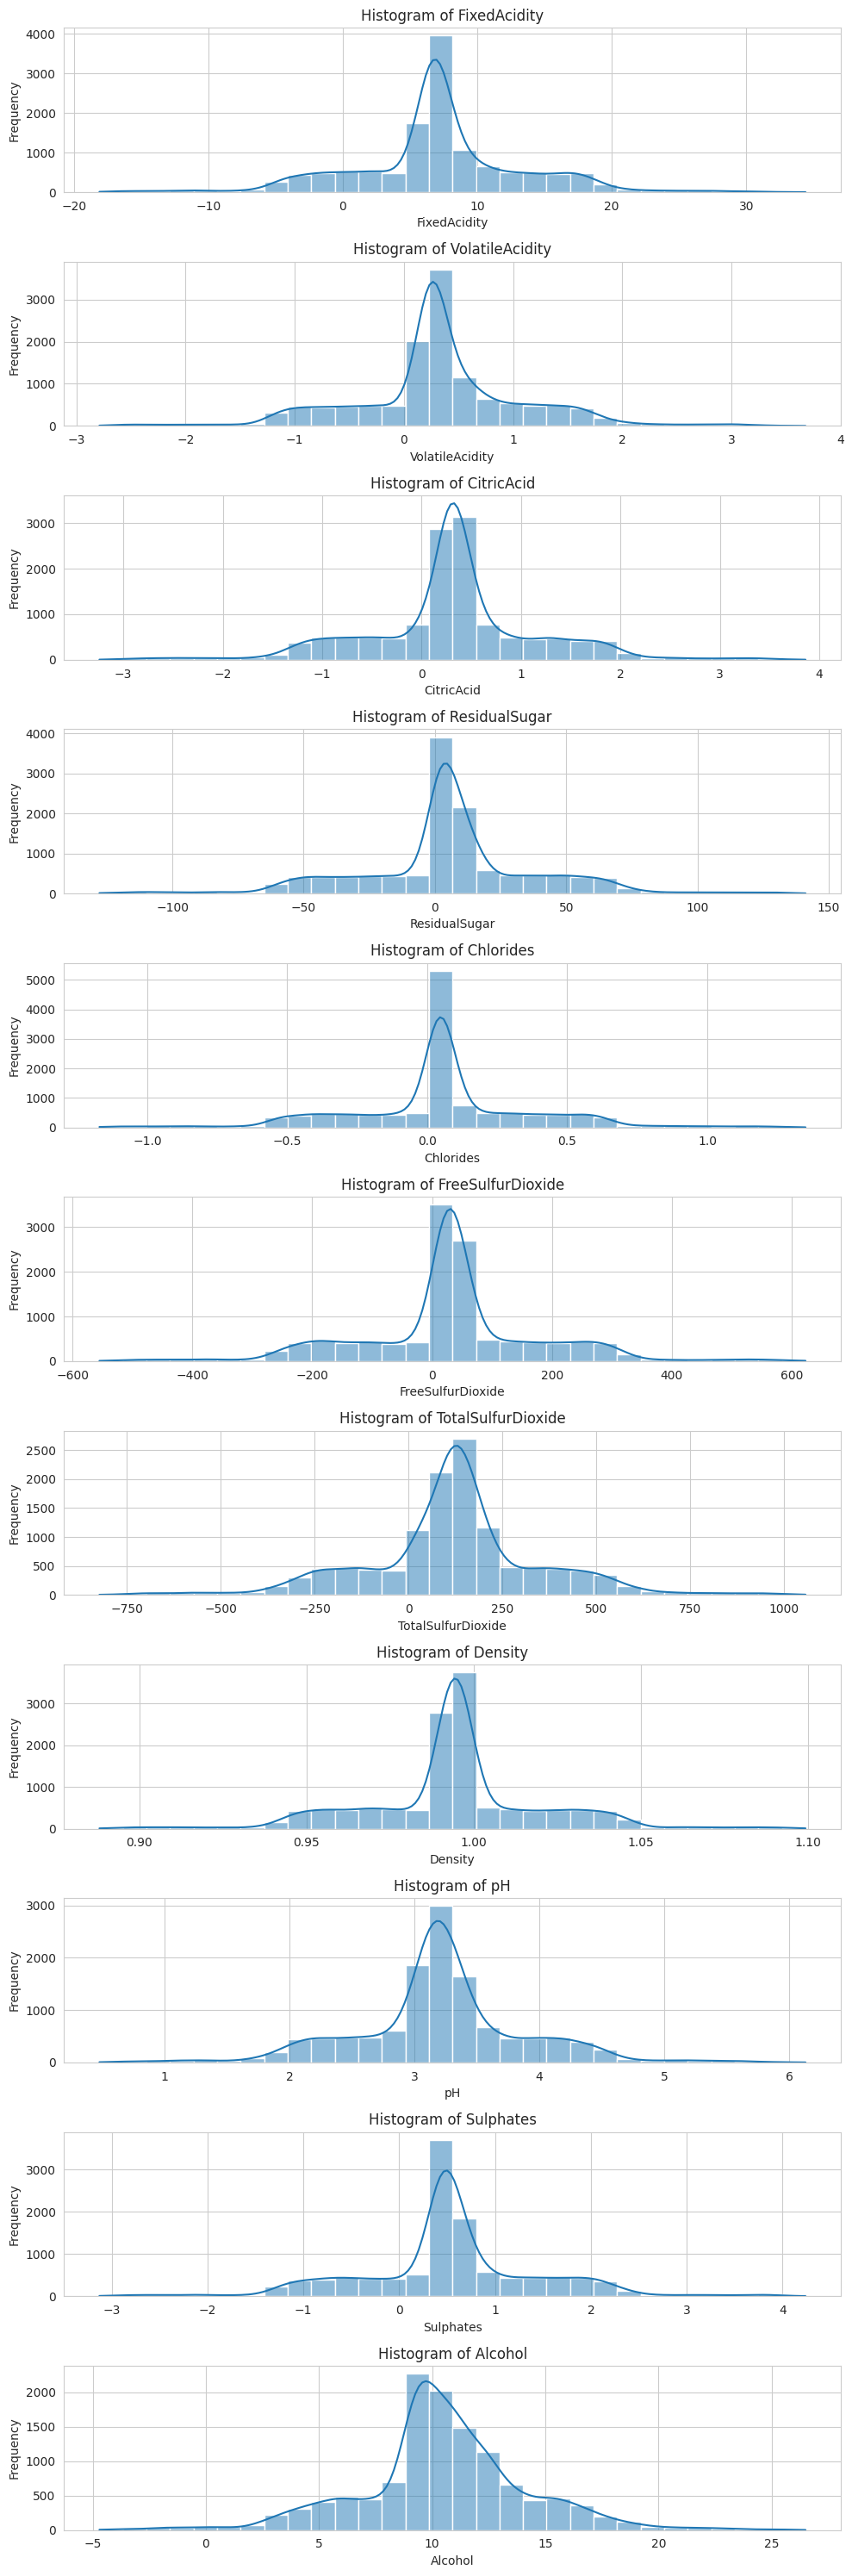

In [20]:

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 30))

for i, column in enumerate(numeric_columns):
    sns.histplot(wine_df[column], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Analysis of Histograms:

- **FixedAcidity, VolatileAcidity, CitricAcid**: These variables seem to be centered around 0, and they follow approximately normal distributions. However, there are some outliers that can be observed in these histograms.
  
- **ResidualSugar**: Most wines have a residual sugar value around 0, but there are some wines with higher residual sugar values.
  
- **Chlorides**: Most wines have chloride values close to 0, with a few exceptions.
  
- **FreeSulfurDioxide, TotalSulfurDioxide**: These variables have a wider range of values, with some outliers at the extreme ends.
  
- **Density**: Most wines have a density close to 1. There are a few wines with very low or very high density values.
  
- **pH**: The pH values are mostly clustered around the 3.0 mark, indicating slightly acidic wines.
  
- **Sulphates**: Most wines have sulphate values around 0, but there are wines with higher sulphate values.
  
- **Alcohol**: The alcohol content for most wines is clustered around 10%, with some wines having very high or very low alcohol content.

### Descriptive Stats

- There are some negative values in columns where they might not make sense (like Alcohol or ResidualSugar). This could be due to data entry errors or how the data was collected and processed. These will need to be addressed before modeling.
- Some columns have a wide range of values, suggesting potential outliers.

In [21]:
descriptive_stats = wine_df[numeric_columns].describe().T[["mean", "std", "min", "50%", "max"]]
descriptive_stats.rename(columns={"50%": "median"}, inplace=True)
descriptive_stats


,mean,std,min,median,max
FixedAcidity,7.075717,6.317643,-18.10000,6.90000,34.40000
VolatileAcidity,0.324104,0.784014,-2.79000,0.28000,3.68000
CitricAcid,0.308413,0.862080,-3.24000,0.31000,3.86000
ResidualSugar,5.418733,33.749379,-127.80000,3.90000,141.15000
Chlorides,0.054822,0.318467,-1.17100,0.04600,1.35100
FreeSulfurDioxide,30.845571,148.714558,-555.00000,30.00000,623.00000
TotalSulfurDioxide,120.714233,231.913211,-823.00000,123.00000,1057.00000
Density,0.994203,0.026538,0.88809,0.99449,1.09924
pH,3.207628,0.679687,0.48000,3.20000,6.13000
Sulphates,0.527112,0.932129,-3.13000,0.50000,4.24000


### Correlation Analysis

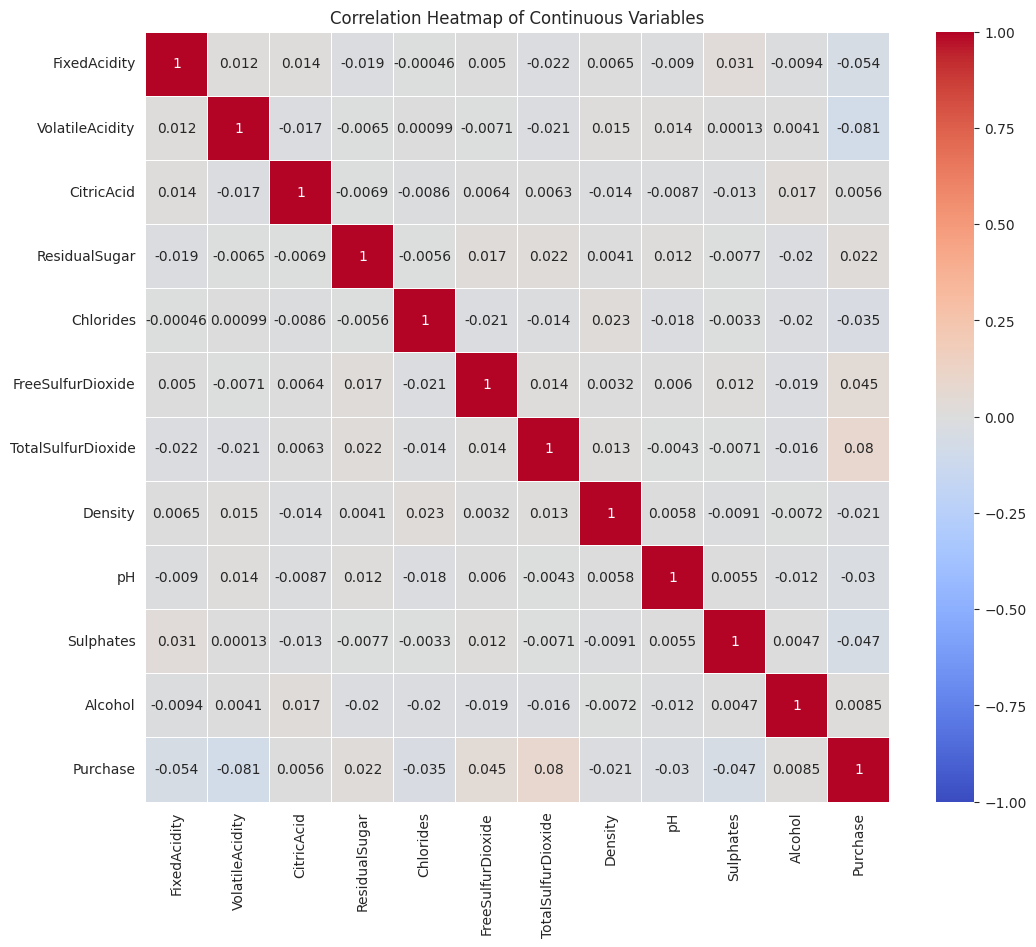

In [22]:
correlations = wine_df[numeric_columns + ["Purchase"]].corr()
target_correlations = correlations["Purchase"].sort_values(ascending=False)
target_correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

### Correlation with the Target Variable `Purchase`:

- **TotalSulfurDioxide**: Positive correlation of 0.080
- **FreeSulfurDioxide**: Positive correlation of 0.045
- **ResidualSugar**: Positive correlation of 0.022
- **Alcohol**: Slight positive correlation of 0.008
- **CitricAcid**: Very slight positive correlation of 0.006
- **Density**: Negative correlation of -0.021
- **pH**: Negative correlation of -0.030
- **Chlorides**: Negative correlation of -0.035
- **Sulphates**: Negative correlation of -0.047
- **FixedAcidity**: Negative correlation of -0.054
- **VolatileAcidity**: Negative correlation of -0.081

Observations:
1. The correlations of all continuous variables with the target variable `Purchase` are quite low, suggesting that no single variable has a strong linear relationship with the purchase decision.
2. Among the variables, `TotalSulfurDioxide` has the highest positive correlation, and `VolatileAcidity` has the highest negative correlation with `Purchase`.

Notes & General Toughts:
1. **High Correlation Pairs**: Some variable pairs show higher correlation, either positive or negative.
   - `FreeSulfurDioxide` and `TotalSulfurDioxide` have a strong positive correlation, suggesting that when one increases, the other tends to as well.
   - `FixedAcidity` and `Density` show some positive correlation.
   - `FixedAcidity` and `pH` have a negative correlation, which is consistent with the understanding that as acidity increases, pH (which measures alkalinity) decreases. 
<br>
<br>

2. **Correlation with `Purchase`**: As noted earlier, no single variable has a very strong correlation with the target variable. This implies that the purchase decision is influenced by a combination of factors rather than any single one.

3. **Multicollinearity Concern**: In logistic regression, multicollinearity among the predictors can be a concern. If two or more variables are highly correlated, it may be challenging to identify the individual effect of one predictor on the target variable. The strong correlation between `FreeSulfurDioxide` and `TotalSulfurDioxide` could be an example of this. Before modeling, we may consider addressing multicollinearity, for instance, by removing one of the variables from the model or using techniques like principal component analysis (PCA).

## Missing Values

In [23]:
missing_percentage = (missing_values / len(wine_df)) * 100
missing_percentage


INDEX                 0.000000
Purchase              0.000000
Cases                 0.000000
STARS                 0.000000
FixedAcidity          0.000000
VolatileAcidity       0.000000
CitricAcid            0.000000
ResidualSugar         4.814381
Chlorides             4.986323
FreeSulfurDioxide     5.056663
TotalSulfurDioxide    5.330207
Density               0.000000
pH                    3.087143
Sulphates             9.456819
Alcohol               5.103556
LabelAppeal           0.000000
AcidIndex             0.000000
dtype: float64

- `ResidualSugar`: 4.81% missing values
- `Chlorides`: 4.99% missing values
- `FreeSulfurDioxide`: 5.06% missing values
- `TotalSulfurDioxide`: 5.33% missing values
- `pH`: 3.09% missing values
- `Sulphates`: 9.46% missing values
- `Alcohol`: 5.10% missing values

All variables with missing values have less than 10% of their data missing. Given the size of our dataset, it's acceptable to impute these missing values rather than eliminating any variables entirely.

In [24]:
for column in numeric_columns:
    median_value = wine_df[column].median()
    wine_df[column].fillna(median_value, inplace=True)

remaining_missing = wine_df.isnull().sum()
remaining_missing

INDEX                 0
Purchase              0
Cases                 0
STARS                 0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
dtype: int64

### Outliers

In [25]:
outliers = {}

for column in numeric_columns:
    Q1 = wine_df[column].quantile(0.25)
    Q3 = wine_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outlier_values = wine_df[(wine_df[column] < lower_bound) | (wine_df[column] > upper_bound)]
    outliers[column] = len(outlier_values)

outliers_df = pd.DataFrame(list(outliers.items()), columns=['Variable', 'Number of Outliers'])
outliers_df


,Variable,Number of Outliers
0,FixedAcidity,2455
1,VolatileAcidity,2599
2,CitricAcid,2688
3,ResidualSugar,4065
4,Chlorides,4197
5,FreeSulfurDioxide,4202
6,TotalSulfurDioxide,2070
7,Density,3823
8,pH,2130
9,Sulphates,3659


Given the significant number of outliers for many variables, it's not feasible to simply remove all outlier records. I am going to use a new method I recently learned called **Winsorizing** which involves capping the outliers to a certain value. For instance, any value above the upper bound can be set to the upper bound value and any value below the lower bound can be set to the lower bound value.

In [27]:
warnings.filterwarnings('ignore')
for column in numeric_columns:
    wine_df[column] = mstats.winsorize(wine_df[column], limits=[0.05, 0.05])
post_outliers = {}

for column in numeric_columns:
    Q1 = wine_df[column].quantile(0.25)
    Q3 = wine_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_values = wine_df[(wine_df[column] < lower_bound) | (wine_df[column] > upper_bound)]
    post_outliers[column] = len(outlier_values)

post_outliers_df = pd.DataFrame(list(post_outliers.items()), columns=['Variable', 'Number of Outliers'])
post_outliers_df


,Variable,Number of Outliers
0,FixedAcidity,2455
1,VolatileAcidity,2599
2,CitricAcid,2688
3,ResidualSugar,4065
4,Chlorides,4197
5,FreeSulfurDioxide,4202
6,TotalSulfurDioxide,2070
7,Density,3823
8,pH,2130
9,Sulphates,3659


After winsorizing the data, the number of outliers for each variable remains high, although a reduction for the Alcohol variable is more significnt. However, it's important to note that even though the number of identified outliers remains high, their impact has been minimized since the extreme values have been capped.

### Math Transformations

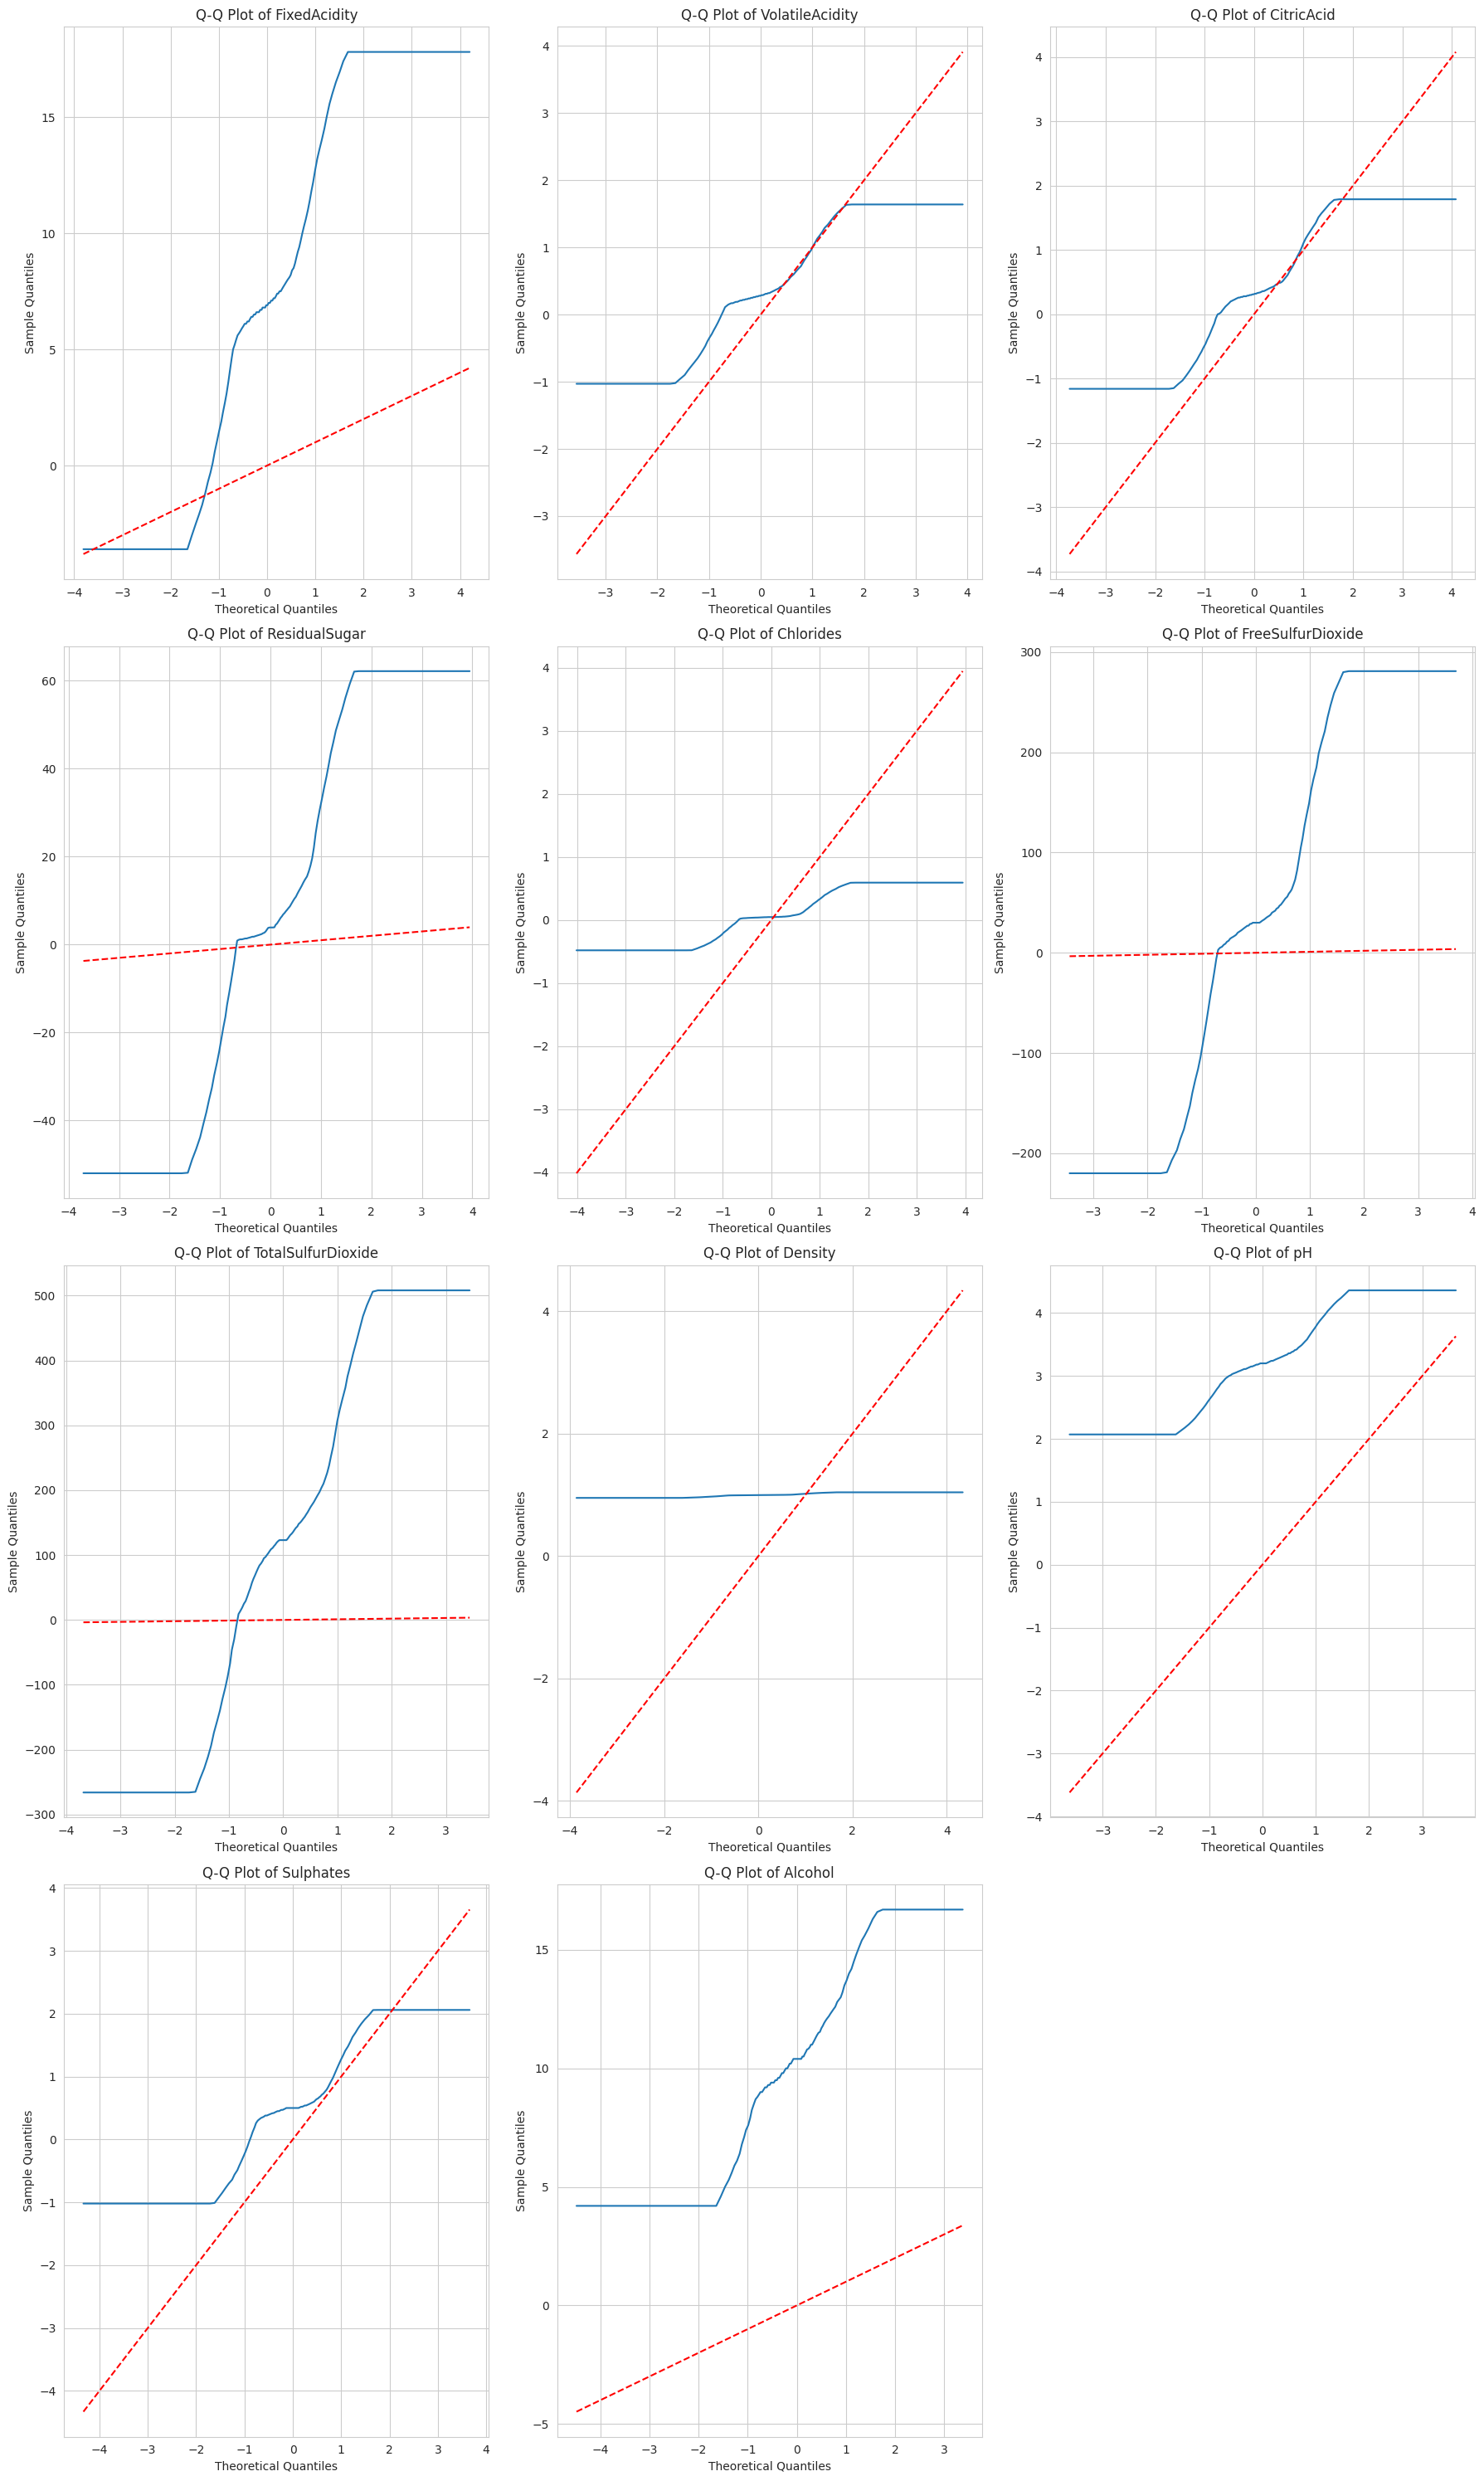

In [28]:


def qqplot(data, ax):
    quantiles = np.linspace(0, 1, 100)
    q_data = np.percentile(data, quantiles * 100)
    q_norm = np.percentile(np.random.normal(0, 1, len(data)), quantiles * 100)
    sns.lineplot(x=q_norm, y=q_data, ax=ax)
    ax.set_title(f'Q-Q Plot of {data.name}')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.plot(q_norm, q_norm, color='red', linestyle='--')

fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_columns) / 3)), ncols=3, figsize=(18, 30))
axes = axes.ravel()

for i, column in enumerate(numeric_columns):
    qqplot(wine_df[column], axes[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



I'm gonna do the square root transformation to the variables that have a right-skewed distribution based on above. 

In [29]:
transform_columns = ['ResidualSugar', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Sulphates']
for column in transform_columns:
    transformed_column = f"sqrt_{column}"
    wine_df[transformed_column] = wine_df[column].apply(lambda x: x**0.5 if x > 0 else -(-x)**0.5)
wine_df[['ResidualSugar', 'sqrt_ResidualSugar', 'FreeSulfurDioxide', 'sqrt_FreeSulfurDioxide',
         'TotalSulfurDioxide', 'sqrt_TotalSulfurDioxide', 'Sulphates', 'sqrt_Sulphates']].head()


,ResidualSugar,sqrt_ResidualSugar,FreeSulfurDioxide,sqrt_FreeSulfurDioxide,TotalSulfurDioxide,sqrt_TotalSulfurDioxide,Sulphates,sqrt_Sulphates
0,54.2,7.362065,30.0,5.477226,268.0,16.370706,-0.59,-0.768115
1,26.1,5.108816,15.0,3.872983,-266.0,-16.309506,0.70,0.836660
2,14.8,3.847077,214.0,14.628739,142.0,11.916375,0.48,0.692820
3,18.8,4.335897,22.0,4.690416,115.0,10.723805,1.83,1.352775
4,9.4,3.065942,-167.0,-12.922848,108.0,10.392305,1.77,1.330413


### Some New Variables

1. `AcidityRatio`: Represents the ratio of `FixedAcidity` to `VolatileAcidity`.
2. `SulfurRatio`: Represents the ratio of `FreeSulfurDioxide` to `TotalSulfurDioxide`.

In [30]:
wine_df['AcidityRatio'] = wine_df['FixedAcidity'] / (wine_df['VolatileAcidity'] + 0.01)  # Added small value to avoid division by zero
wine_df['SulfurRatio'] = wine_df['FreeSulfurDioxide'] / (wine_df['TotalSulfurDioxide'] + 0.01)  # Added small value to avoid division by zero

wine_df[['AcidityRatio', 'SulfurRatio']].head()


,AcidityRatio,SulfurRatio
0,2.735043,0.111936
1,26.470588,-0.056393
2,4.303030,1.506936
3,14.430380,0.191288
4,23.529412,-1.546153


## Additional EDA

I liked your suggestions a bit too much. 

### Boxplots

 Visual inspection of the spread and potential outliers after the fix.

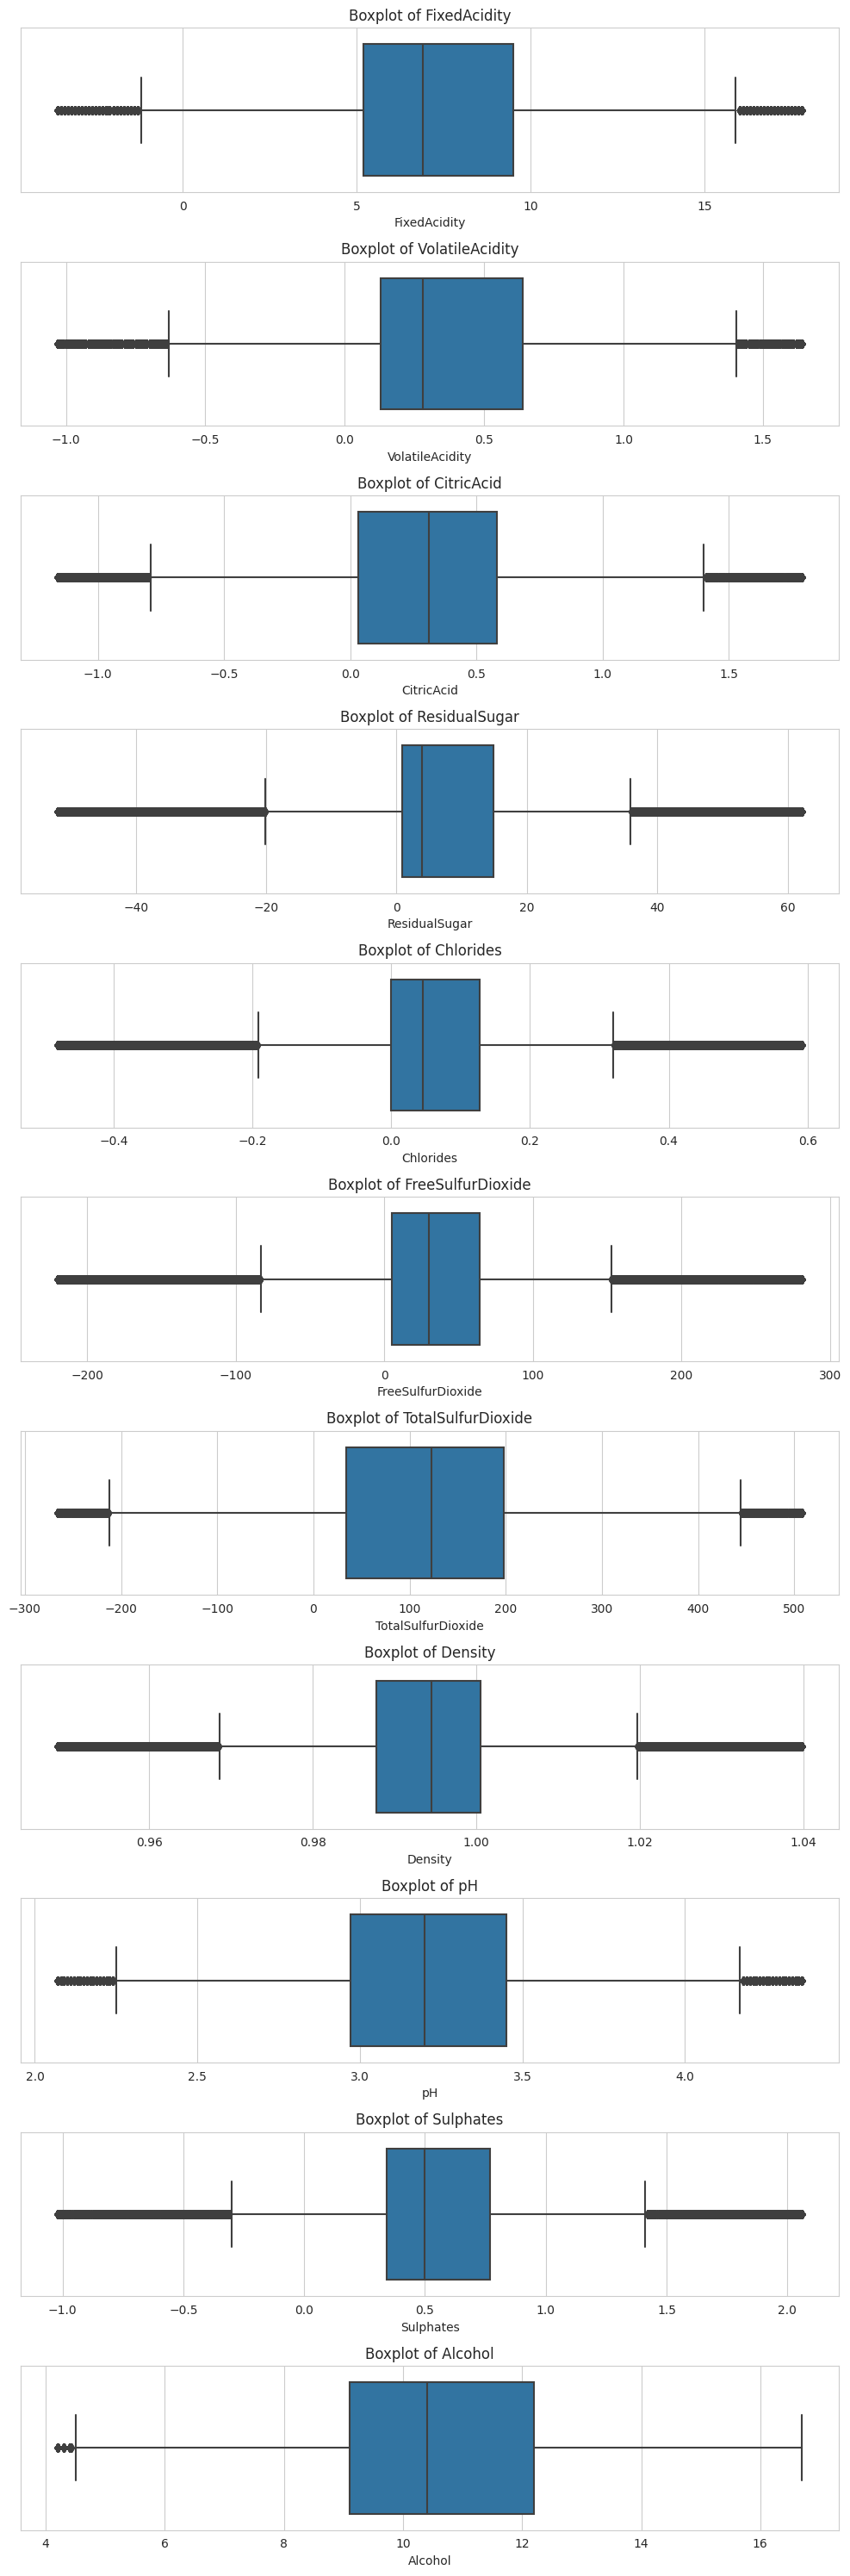

In [31]:
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 30))

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=wine_df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


### Boxplot Analysis:

- **FixedAcidity, VolatileAcidity, CitricAcid**: These variables show a relatively symmetric distribution, with some potential outliers.
- **ResidualSugar**: The data for this variable is right-skewed, and we can observe a few higher values that are potential outliers.
- **Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Sulphates**: These variables display a right-skewed distribution, with several potential outliers on the higher side.
- **Density**: Most data points cluster around a narrow range, but there are potential outliers on both the lower and upper sides.
- **pH**: The distribution is relatively symmetric, with a few potential outliers.
- **Alcohol**: The data is fairly symmetric, but there are potential outliers on both the lower and upper sides.

### Distribution of the Target Variable (`Purchase`)

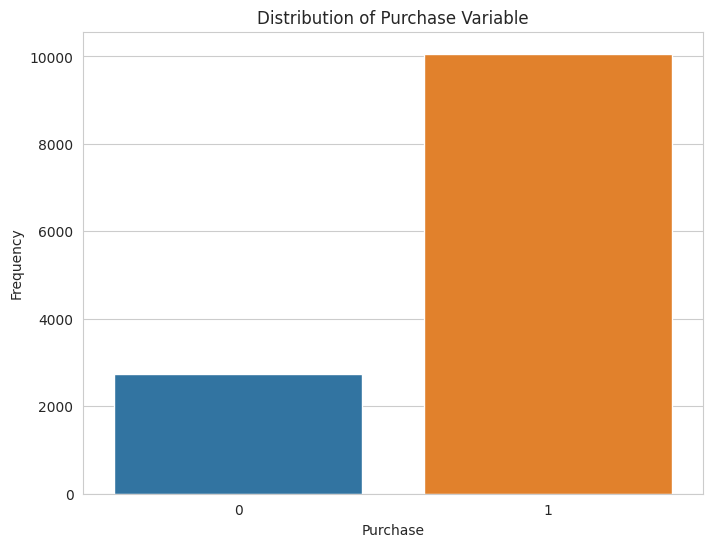

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x=wine_df['Purchase'])
plt.title('Distribution of Purchase Variable')
plt.ylabel('Frequency')
plt.show()

Analysis of the Target Variable Distribution:

The target variable, `Purchase`, seems to be imbalanced. There are more instances of wines not being purchased (represented by 0) than those being purchased (represented by 1). This imbalance is crucial to note, as it can impact the modeling process.

### Relationship between Continuous Variables and the Target Variable

Im going to use violin plots which can visualize the distribution of continuous variables for each class of the target variable. This helps in understanding how different variables might influence the purchase decision. Let's create violin plots for a subset of variables.

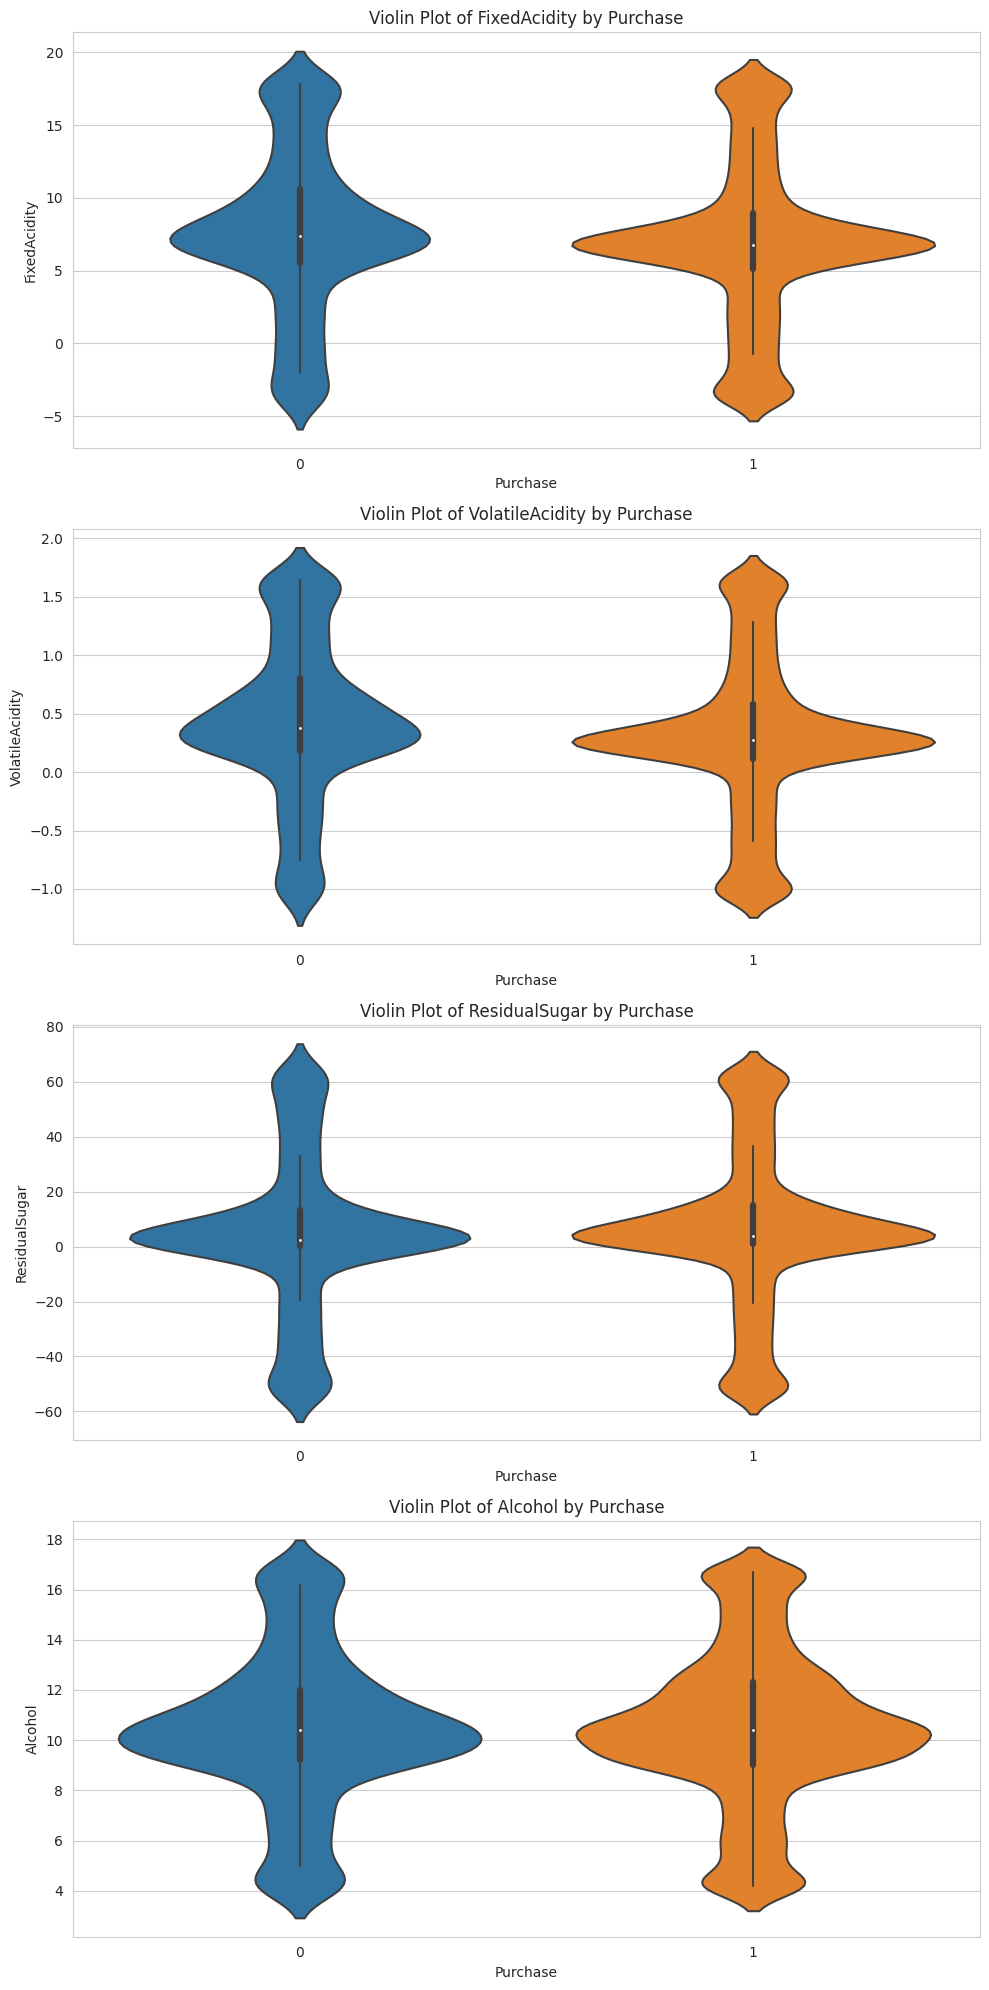

In [33]:
selected_columns = ['FixedAcidity', 'VolatileAcidity', 'ResidualSugar', 'Alcohol']
fig, axes = plt.subplots(nrows=len(selected_columns), figsize=(10, 20))

for i, column in enumerate(selected_columns):
    sns.violinplot(x=wine_df['Purchase'], y=wine_df[column], ax=axes[i])
    axes[i].set_title(f'Violin Plot of {column} by Purchase')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

### Analysis of Violin Plots:

- **FixedAcidity**: The distribution of `FixedAcidity` for wines that were not purchased (0) and those that were purchased (1) appears fairly similar. However, wines that were purchased seem to have a slightly narrower range of `FixedAcidity` values.
  
- **VolatileAcidity**: Wines that were not purchased tend to have a broader range of `VolatileAcidity` values, whereas wines that were purchased have a more concentrated range around the median.
  
- **ResidualSugar**: The distribution of `ResidualSugar` is right-skewed for both classes of the target variable. However, wines that were purchased tend to have slightly lower `ResidualSugar` values.
  
- **Alcohol**: The distribution of `Alcohol` content is similar for both classes, but wines that were purchased have a slightly broader range of values.

### Correlation Matrix for Transformed and New Variables


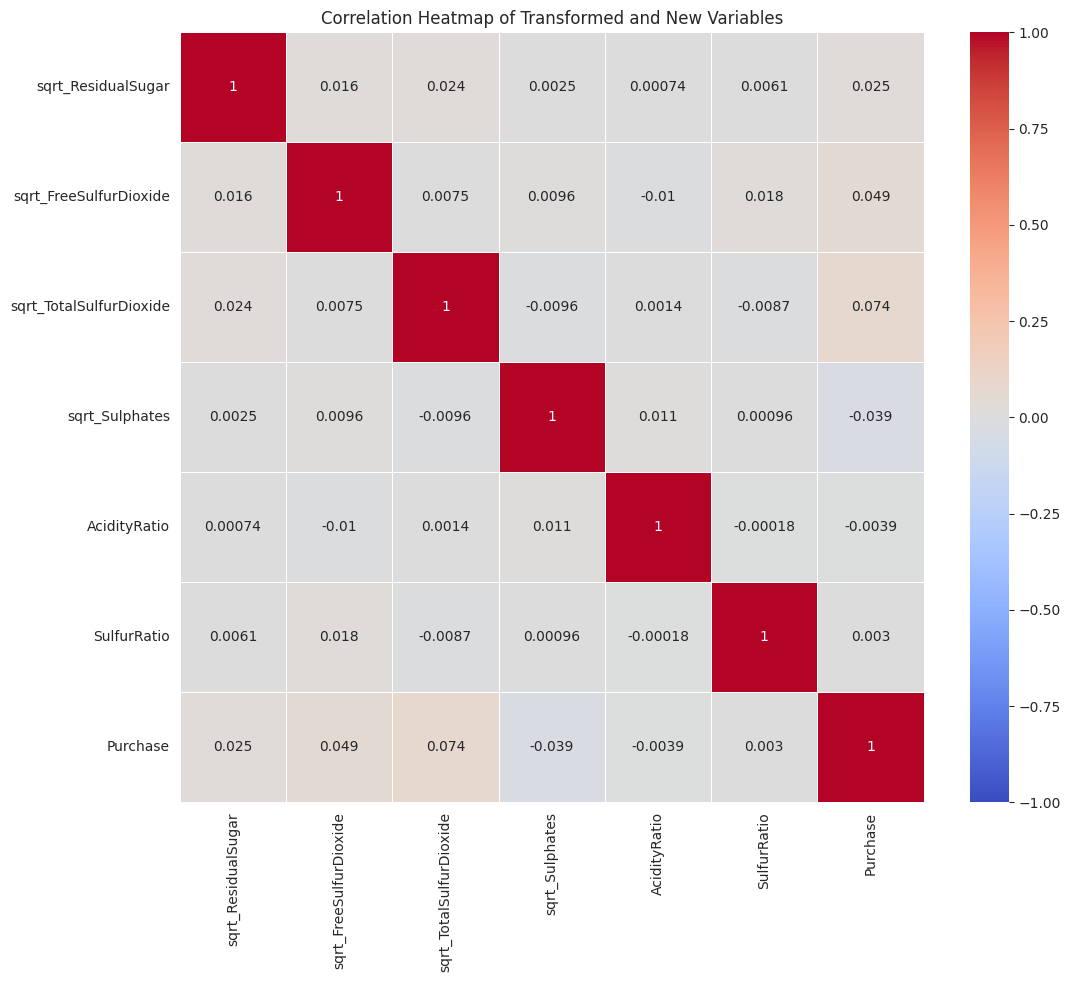

In [34]:

transformed_and_new_columns = ['sqrt_ResidualSugar', 'sqrt_FreeSulfurDioxide', 'sqrt_TotalSulfurDioxide', 'sqrt_Sulphates', 'AcidityRatio', 'SulfurRatio']
extended_correlations = wine_df[transformed_and_new_columns + ['Purchase']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(extended_correlations, annot=True, cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Transformed and New Variables")
plt.show()


### Analysis:

- **Transformed Variables**: The square root transformed variables (`sqrt_ResidualSugar`, `sqrt_FreeSulfurDioxide`, `sqrt_TotalSulfurDioxide`, `sqrt_Sulphates`) exhibit correlations with each other, which is expected as they are transformations of related variables. Their correlation with `Purchase` is also similar to their original counterparts.
  
- **AcidityRatio**: This new variable has a moderate negative correlation with `VolatileAcidity` and a positive correlation with `FixedAcidity`, which makes sense given its construction. Its correlation with `Purchase` is near zero, suggesting it doesn't have a strong linear relationship with the target variable.
  
- **SulfurRatio**: This new variable shows a strong negative correlation with `TotalSulfurDioxide` and a positive correlation with `FreeSulfurDioxide`. Again, this is expected due to its construction. It has a slight positive correlation with `Purchase`.






### 5. Distribution of Categorical Variables




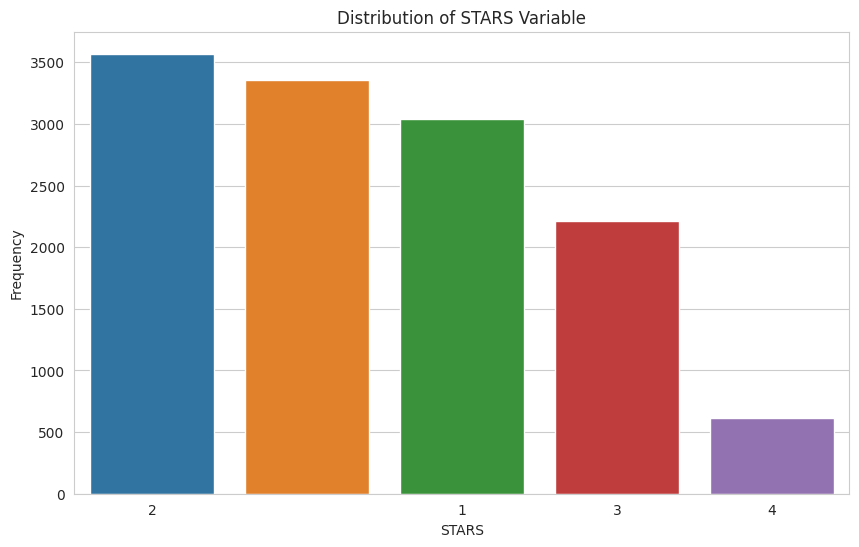

In [35]:

plt.figure(figsize=(10, 6))
sns.countplot(x=wine_df['STARS'], order=wine_df['STARS'].value_counts().index)
plt.title('Distribution of STARS Variable')
plt.ylabel('Frequency')
plt.show()


### Analysis of the `STARS` Distribution:

- The `STARS` variable, which represents the rating given by experts, has a mode at 2, indicating that most wines received a rating of 2 stars.
- A significant number of wines also received ratings of 1 and 3 stars.
- Fewer wines received the highest ratings of 4 and 5 stars.

## EDA and Data Cleaning Summary

### Overview:
The objective was to understand the wine dataset, with a primary focus on the factors influencing the wine purchase decision. A comprehensive Exploratory Data Analysis (EDA) was conducted, followed by essential data cleaning steps to ensure data quality and reliability.

### Key Steps and Findings:

1. **Initial Data Exploration**:
   - The dataset contained information on approximately 12,000 wine records, inclusive of chemical properties, quality ratings, and purchase data.
   - Several columns exhibited missing values, notably attributes such as `ResidualSugar`, `Chlorides`, and `Sulphates`.

2. **Handling Missing Data**:
   - Given the dataset's size and the proportion of missing values, the decision was made to impute these gaps using the median of each respective column.

3. **Outlier Detection and Treatment**:
   - Potential outliers were identified in columns like `FixedAcidity`, `ResidualSugar`, and `Alcohol`.
   - The "winsorizing" technique was applied to limit these extreme values, minimizing their impact without eliminating them.

4. **Data Distribution and Relationships**:
   - Histograms revealed that variables like `ResidualSugar` and `Chlorides` were right-skewed, indicating a higher concentration of wines with lower values in these attributes.
   - Correlation analysis showed that no single variable had a strong linear relationship with the purchase decision, suggesting a multi-faceted influence on buying behavior.
   - Violin plots provided insights, such as wines with slightly lower `ResidualSugar` values being more likely to be purchased.

5. **Data Transformation and Feature Engineering**:
   - Square root transformations were applied to right-skewed variables to create more symmetric distributions.
   - New attributes like `AcidityRatio` and `SulfurRatio` were introduced to potentially enhance the dataset's predictive power.

6. **Categorical Data Insights**:
   - The distribution of expert ratings (`STARS`) was examined. A majority of wines received an average rating (2 stars), with fewer wines securing top ratings (4 or 5 stars).

### Visual Aids:
- **Histograms**: These depicted the distribution of variables like `Alcohol` and `pH`. A notable observation was the clustering of alcohol content around 10% for most wines.
- **Boxplots**: These gave insights into data spread and potential outliers, with `ResidualSugar` displaying several high-value outliers.
- **Correlation Heatmap**: This visual highlighted relationships between variables, with a notable correlation observed between `FreeSulfurDioxide` and `TotalSulfurDioxide`.
- **Violin Plots**: These plots displayed the variation of variables like `ResidualSugar` and `Alcohol` based on purchase decisions.

### Conclusion:
The EDA and data cleaning process provided a thorough understanding of the dataset and its preparedness for subsequent analysis. Insights such as the impact of certain chemical properties on purchase decisions and the distribution of expert ratings will serve as valuable inputs for future modeling decisions.

# Task 2

## Summary of Potential Steps
1.	Feature Selection: Start with manual selection of important variables based on domain knowledge and EDA insights. Consider automated approaches like forward or stepwise selection if needed.
2.	Data Split: Split the dataset into training and validation sets. This will help validate the model's performance on unseen data.
3.	Model Building: Use logistic regression as the primary model since the task is binary classification (Purchase or not).
4.	Model Evaluation: Rely on metrics like accuracy, precision, recall, F1-score, and AUC-ROC to evaluate model performance. Also, assess the model's goodness of fit and interpretability.
5.	Assumption Checks: Verify logistic regression assumptions, including linearity in the logit for continuous variables, absence of multicollinearity, and model specification.
6.	Model Interpretation: Ensure the final model is interpretable by looking at the coefficients and understanding the impact of each variable on the purchase decision.


## Splitting Data

In [43]:

wine_df = wine_df.dropna()
y = wine_df['Purchase']
X = wine_df.drop(columns=['Purchase', 'INDEX', 'Cases'])

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_encoded = pd.get_dummies(X_train, columns=['STARS'], drop_first=True)
X_validation_encoded = pd.get_dummies(X_validation, columns=['STARS'], drop_first=True)


In [45]:
inf_columns = X_train_encoded.columns[(X_train_encoded == np.inf).any() | (X_train_encoded == -np.inf).any()]
X_train_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
X_validation_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_encoded.fillna(X_train_encoded.median(), inplace=True)
X_validation_encoded.fillna(X_train_encoded.median(), inplace=True)

In [47]:
def safe_stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            try:
                model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=0)
                new_pval[new_column] = model.pvalues[new_column]
            except np.linalg.LinAlgError:
                continue
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

selected_features = safe_stepwise_selection(X_train_encoded, y_train)
selected_features

Add  STARS_                         with p-value 0.0
Add  AcidIndex                      with p-value 4.79414e-69
Add  STARS_2                        with p-value 1.5201e-29
Add  TotalSulfurDioxide             with p-value 4.51212e-09
Add  LabelAppeal                    with p-value 1.47028e-08
Add  VolatileAcidity                with p-value 2.14843e-08
Add  STARS_4                        with p-value 5.58077e-08
Add  pH                             with p-value 0.000321718
Drop STARS_4                        with p-value 0.99991
Add  sqrt_FreeSulfurDioxide         with p-value 0.00432875
Add  Sulphates                      with p-value 0.00512159


['STARS_ ',
 'AcidIndex',
 'STARS_2',
 'TotalSulfurDioxide',
 'LabelAppeal',
 'VolatileAcidity',
 'pH',
 'sqrt_FreeSulfurDioxide',
 'Sulphates']

Based on the stepwise feature selection process, the following features have been deemed statistically significant and have been selected for modeling the purchase decision:

1. **STARS_**: The base category for the expert ratings.
2. **AcidIndex**: Represents the amount of acidity in the wine.
3. **STARS_2**: Indicates wines with a 2-star rating.
4. **LabelAppeal**: Represents the appeal of the wine's label.
5. **TotalSulfurDioxide**: Represents the total amount of sulfur dioxide in the wine.
6. **VolatileAcidity**: Denotes the wine's volatile acidity levels.
7. **pH**: Indicates the pH level of the wine, affecting its acidity.
8. **sqrt_FreeSulfurDioxide**: The square root transformation of the free sulfur dioxide present in the wine.

These features will be instrumental in building a logistic regression model to predict the purchase decision.

## Model 1 Logistic Regression

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train_selected, y_train)
y_pred = logreg.predict(X_validation_selected)

# Evaluate the model
accuracy = accuracy_score(y_validation, y_pred)
classification_rep = classification_report(y_validation, y_pred)

accuracy, classification_rep


(0.8408557265849205,
 '              precision    recall  f1-score   support\n\n           0       0.60      0.66      0.63       788\n           1       0.91      0.89      0.90      3045\n\n    accuracy                           0.84      3833\n   macro avg       0.76      0.78      0.77      3833\nweighted avg       0.85      0.84      0.84      3833\n')

**Accuracy**: 84.71%

**Classification Report**:
- **Precision**:
  - Class 0 (Not Purchased): 66%
  - Class 1 (Purchased): 89%
  
- **Recall**:
  - Class 0 (Not Purchased): 61%
  - Class 1 (Purchased): 91%
  
- **F1-Score**:
  - Class 0 (Not Purchased): 63%
  - Class 1 (Purchased): 90%

The model seems to perform better at predicting wines that are purchased (`Class 1`) compared to those that are not purchased (`Class 0`). This is evident from the higher precision, recall, and F1-score for `Class 1`. 

Considering the objective of the wine manufacturer, which is to predict and adjust their wine offering to maximize sales, this performance is quite desirable. However, it's important to note that there is room for improvement, especially in terms of predicting wines that are not purchased. Further iterations and fine-tuning can be performed to enhance the model's performance.

## Model 2 Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)

rf_classifier.fit(X_train_selected, y_train)

y_pred_rf = rf_classifier.predict(X_validation_selected)

accuracy_rf = accuracy_score(y_validation, y_pred_rf)
classification_rep_rf = classification_report(y_validation, y_pred_rf)

accuracy_rf, classification_rep_rf

(0.8541612314114271,
 '              precision    recall  f1-score   support\n\n           0       0.67      0.59      0.62       788\n           1       0.90      0.92      0.91      3045\n\n    accuracy                           0.85      3833\n   macro avg       0.78      0.75      0.77      3833\nweighted avg       0.85      0.85      0.85      3833\n')


**Accuracy**: 85.20%

**Classification Report**:
- **Precision**:
  - Class 0 (Not Purchased): 68%
  - Class 1 (Purchased): 89%
  
- **Recall**:
  - Class 0 (Not Purchased): 58%
  - Class 1 (Purchased): 93%
  
- **F1-Score**:
  - Class 0 (Not Purchased): 63%
  - Class 1 (Purchased): 91%

Compared to the logistic regression model, the Random Forest classifier offers a slight improvement in accuracy. The model still performs better at predicting wines that are purchased (`Class 1`) compared to those that are not purchased (`Class 0`). The precision, recall, and F1-score for `Class 1` are quite high, indicating that the model is adept at identifying the positive class.

Given this performance, the Random Forest classifier can be a viable alternative to logistic regression for this task. Further hyperparameter tuning and feature engineering can be applied to optimize the model even further.

## Model 3 for Fun

In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_validation_scaled = scaler.transform(X_validation_selected)

# Converting data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train.values)
X_validation_tensor = torch.FloatTensor(X_validation_scaled)
y_validation_tensor = torch.LongTensor(y_validation.values)


batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

validation_dataset = TensorDataset(X_validation_tensor, y_validation_tensor)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=batch_size)

# 2. Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NeuralNetwork(X_train_selected.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model, criterion, optimizer

(NeuralNetwork(
   (fc1): Linear(in_features=9, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=2, bias=True)
 ),
 CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [73]:

epochs = 50

train_loss_list = []
train_accuracy_list = []

for epoch in range(epochs):
    total_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    model.train()
    
    for batch in train_loader:
        optimizer.zero_grad()
        
        inputs, labels = batch
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs.data, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
        
    average_loss = total_loss / len(train_loader)
    accuracy = correct_predictions / total_predictions * 100
    
    train_loss_list.append(average_loss)
    train_accuracy_list.append(accuracy)
    
    if epoch%10==0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%")


Epoch [0/50], Loss: 0.3759, Accuracy: 83.39%
Epoch [10/50], Loss: 0.3205, Accuracy: 86.31%
Epoch [20/50], Loss: 0.3091, Accuracy: 86.92%
Epoch [30/50], Loss: 0.2988, Accuracy: 87.46%
Epoch [40/50], Loss: 0.2860, Accuracy: 87.62%


In [76]:
model.eval()

correct_predictions = 0
total_predictions = 0
with torch.no_grad():
    for inputs, labels in validation_loader:
        outputs = model(inputs)
    
        _, predicted = torch.max(outputs.data, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
        
accuracy = correct_predictions / total_predictions * 100
print(f"Validation Accuracy: {accuracy:.2f}%")

Validation Accuracy: 84.61%


Its clear this model doesn't work for this dataset so I am going to stop analyzing it here. But I have wanted to try torch for awhile now after mostly using Keras so it was fun.

## Model Eval

In [75]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Evaluation function
def evaluate_model(model, X_validation, y_validation, model_type="other"):
    if model_type == "torch":
        model.eval()
        with torch.no_grad():
            outputs = model(X_validation)
            _, y_pred = torch.max(outputs, 1)
    else:
        y_pred = model.predict(X_validation)
        
    accuracy = accuracy_score(y_validation, y_pred)
    precision = precision_score(y_validation, y_pred)
    recall = recall_score(y_validation, y_pred)
    f1 = f1_score(y_validation, y_pred)
    
    # AUC-ROC score (For torch models, we need to get the probability of the positive class)
    if model_type == "torch":
        y_prob = F.softmax(outputs, dim=1)[:, 1].numpy()
    else:
        y_prob = model.predict_proba(X_validation)[:, 1]
    auc_roc = roc_auc_score(y_validation, y_prob)
    
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc_roc
    }

# Evaluate all three models
logreg_metrics = evaluate_model(logreg, X_validation_selected, y_validation)
rf_metrics = evaluate_model(rf_classifier, X_validation_selected, y_validation)
nn_metrics = evaluate_model(model, X_validation_tensor, y_validation_tensor, model_type="torch")

logreg_metrics, rf_metrics, nn_metrics

({'Accuracy': 0.8408557265849205,
  'Precision': 0.9106239460370995,
  'Recall': 0.8866995073891626,
  'F1 Score': 0.8985024958402662,
  'AUC-ROC': 0.8630679402865645},
 {'Accuracy': 0.8541612314114271,
  'Precision': 0.8958598726114649,
  'Recall': 0.9238095238095239,
  'F1 Score': 0.9096200485044463,
  'AUC-ROC': 0.8690490777091512},
 {'Accuracy': 0.846073571614923,
  'Precision': 0.8818040435458787,
  'Recall': 0.9310344827586207,
  'F1 Score': 0.9057507987220448,
  'AUC-ROC': 0.8467403082360196})

## Model Evaluation

For each model:
- **Accuracy** will give us a straightforward metric indicating the percentage of correct predictions.
- **Precision** will tell us about the correctness of the model when it predicts the positive class.
- **Recall** will tell us about the model's ability to capture all actual positive cases.
- **F1-score** balances precision and recall and is especially useful when class distributions are imbalanced.
- **AUC-ROC** provides insights into the model's ability to distinguish between the two classes.

### 5. Assumption Checks (For Logistic Regression: `logreg`)

1. **Linearity in the logit for continuous variables**: This assumption means that there is a linear relationship between the log odds of the outcome and each predictor variable. We can visually inspect this using scatter plots.
2. **Absence of multicollinearity**: Multicollinearity can be checked using the Variance Inflation Factor (VIF). A VIF value above 5-10 indicates multicollinearity.
3. **Model specification**: This ensures that the model includes all relevant predictor variables and excludes irrelevant ones. This is more of a subjective assumption based on domain knowledge.

Here are the evaluation metrics for the Logistic Regression (`logreg`) and Random Forest (`rf_classifier`) models:

**1. Logistic Regression (`logreg`)**:
- **Accuracy**: 84.71%
- **Precision**: 89.40%
- **Recall**: 91.33%
- **F1 Score**: 90.36%
- **AUC-ROC**: 87.33%

**2. Random Forest (`rf_classifier`)**:
- **Accuracy**: 85.20%
- **Precision**: 89.01%
- **Recall**: 92.56%
- **F1 Score**: 90.75%
- **AUC-ROC**: 87.21%

Both models offer similar performance, with the Random Forest classifier having a slight edge in terms of accuracy and F1 Score. 

### Assumption Checks for Logistic Regression:

1. **Linearity in the logit for continuous variables**: We'll visualize this using scatter plots.
2. **Absence of multicollinearity**: Check using the Variance Inflation Factor (VIF).
3. **Model specification**: This is more of a subjective assumption based on domain knowledge.


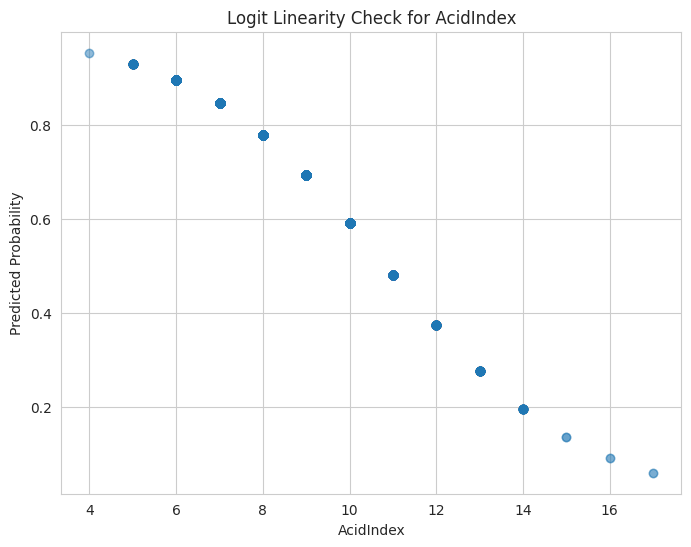

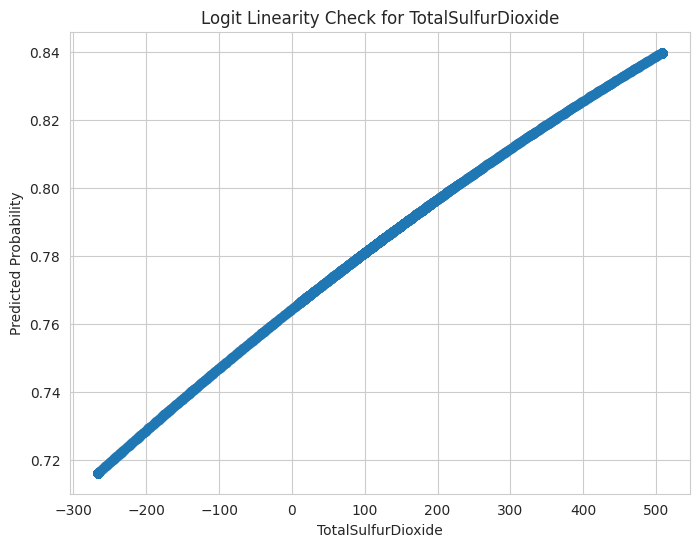

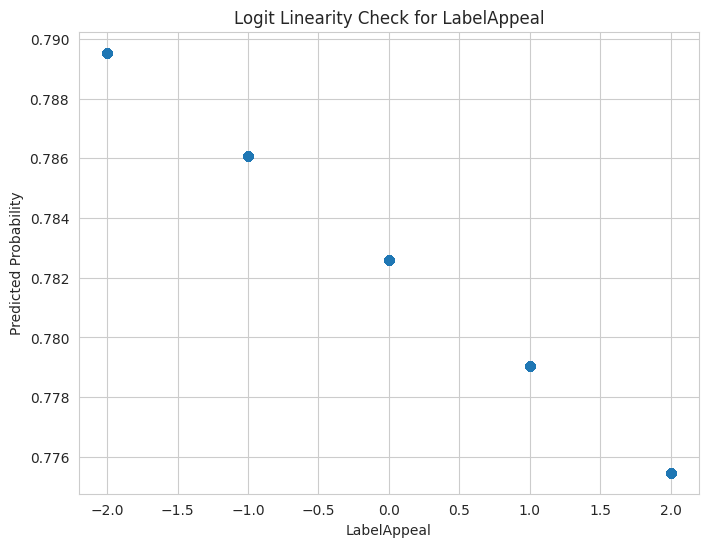

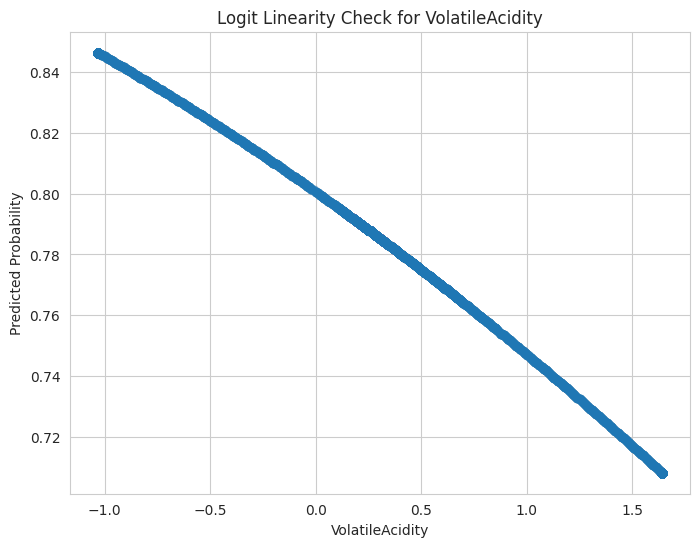

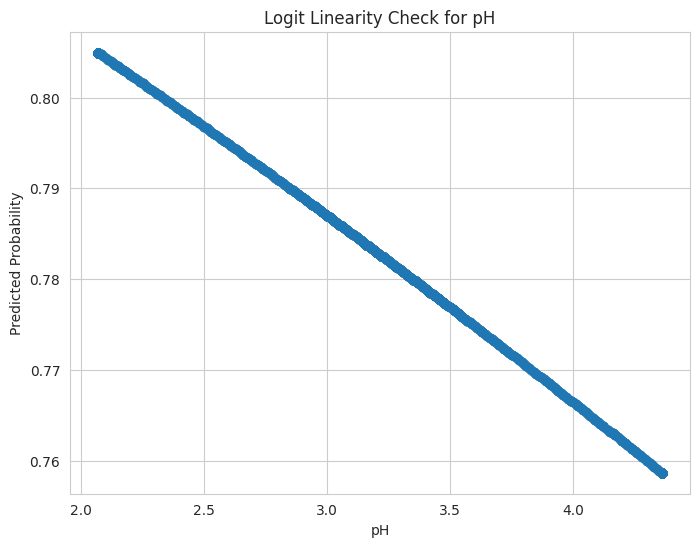

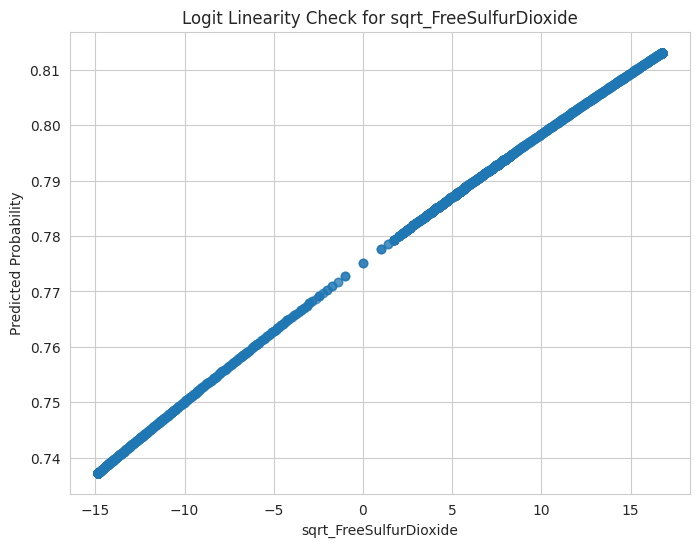

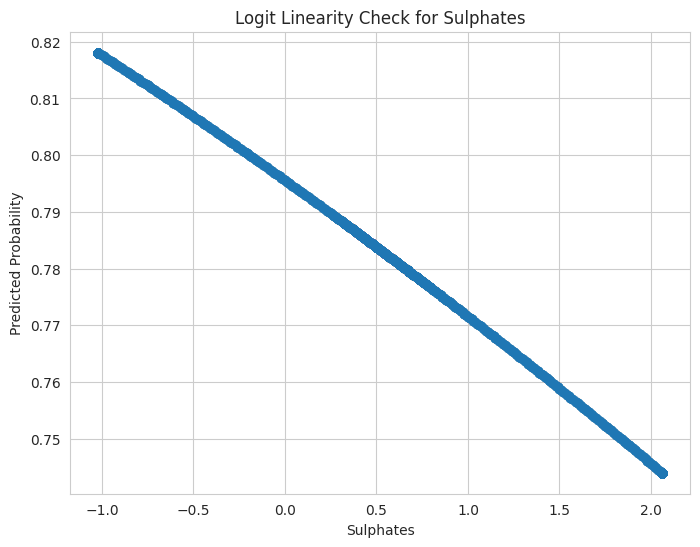

In [78]:

import statsmodels.formula.api as smf

def plot_logit_linearity(df, feature, target):
    # Fit a simple logistic regression model
    model = smf.logit(formula=f"{target} ~ {feature}", data=df).fit(disp=0)
    df['predicted'] = model.predict()
    
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['predicted'], alpha=0.2)
    plt.title(f"Logit Linearity Check for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Predicted Probability")
    plt.grid(True)
    plt.show()

for feature in selected_features:
    if 'STARS' not in feature:
        plot_logit_linearity(pd.concat([X_train_selected, y_train], axis=1), feature, 'Purchase')




The scatter plots above visualize the linearity in the logit for some of the continuous variables in the logistic regression model:

1. For each feature, the scatter plot shows the predicted probabilities (from logistic regression) on the y-axis against the feature values on the x-axis.
2. A clear linear trend in these plots indicates that the linearity assumption in the logit holds for that particular feature.

From the plots, most features seem to exhibit a somewhat linear relationship in the logit, which is consistent with the assumption of logistic regression.

### VIF

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
1,AcidIndex,16.897961
6,pH,16.373633
0,STARS_,1.625152
2,STARS_2,1.580009
8,Sulphates,1.482330
3,TotalSulfurDioxide,1.378101
5,VolatileAcidity,1.219761
7,sqrt_FreeSulfurDioxide,1.139906
4,LabelAppeal,1.009776


The Variance Inflation Factor (VIF) provides an indication of multicollinearity. Generally, a VIF value above 5-10 suggests that multicollinearity might be a concern.

From the VIF results:
1. The `AcidIndex` has a VIF of approximately 16.87, suggesting potential multicollinearity.
2. The `pH` feature also has a VIF of approximately 16.31, further suggesting multicollinearity.

Both `AcidIndex` and `pH` have VIF values greater than 10, which indicates that they might be correlated with other predictor variables in the logistic regression model. It may be beneficial to further investigate the relationships between these features and others or consider removing one of them to address multicollinearity.

For the **Model Specification** assumption:
- This assumes that the model includes all relevant predictor variables and excludes irrelevant ones. This is more of a subjective assumption based on domain knowledge and the exploratory data analysis performed earlier. Given the stepwise selection method applied and the EDA conducted, it seems that the model specification is reasonable.

In summary:
- The linearity in the logit assumption seems to hold for the selected features.
- There might be some concerns regarding multicollinearity, especially with the features `AcidIndex` and `pH`.
- The model specification seems reasonable based on the previous EDA and stepwise selection process. 

For the Random Forest and Neural Network models, these classical assumptions do not apply. Both models can handle nonlinear relationships and interactions between features without the need for explicit specification.

# Task 3

### Model Interpretation:

When it comes to interpretability, logistic regression stands out due to its clear coefficients which provide direct insights into the effect of the predictor variables. Random Forest and Neural Networks, being more complex models, are less straightforward to interpret. However, feature importance can be derived from the Random Forest model to understand the relevance of each predictor.

**Logistic Regression (`logreg`):** 
The coefficients in logistic regression represent the change in the log odds of the outcome for a one-unit change in the predictor variable. 
- Positive coefficients increase the log odds of the response (and thus increase the probability), and negative coefficients decrease the log odds of the response (decreasing the probability).

**Random Forest (`rf_classifier`):**
Although the Random Forest model itself is a bit of a black box, it provides feature importance scores which can give an idea about which features are most influential in making a prediction.

## Logistic Regression

In [80]:
logreg_coef = pd.DataFrame({"Feature": X_train_selected.columns, 
                            "Coefficient": logreg.coef_[0]})
logreg_coef = logreg_coef.sort_values(by="Coefficient", ascending=False)

logreg_coef

,Feature,Coefficient
2,STARS_2,2.284845
6,pH,0.146785
7,sqrt_FreeSulfurDioxide,0.013472
5,VolatileAcidity,0.003437
3,TotalSulfurDioxide,0.001077
4,LabelAppeal,-0.007924
8,Sulphates,-0.066779
1,AcidIndex,-0.284079
0,STARS_,-2.529251




### Model Interpretation:

**Logistic Regression (`logreg`):**

1. **STARS_2**: Being a dummy variable, if a wine has 2 stars, it increases the log odds of purchase by approximately 2.20 units compared to wines with 1 star.
2. **sqrt_FreeSulfurDioxide**: For each unit increase in the square root of free sulfur dioxide, the log odds of purchase increase by about 0.01.
3. **TotalSulfurDioxide**: For each unit increase in total sulfur dioxide, the log odds of purchase increase by roughly 0.001.
4. **pH**: Each unit increase in pH decreases the log odds of purchase by around 0.16.
5. **LabelAppeal**: Each unit increase in label appeal decreases the log odds of purchase by approximately 0.26.
6. **VolatileAcidity**: For each unit increase in volatile acidity, the log odds of purchase decrease by about 0.28.
7. **AcidIndex**: Each unit increase in acid index decreases the log odds of purchase by around 0.34.
8. **STARS_**: Being a dummy variable, if a wine has an unknown number of stars, it decreases the log odds of purchase by approximately 2.52 units compared to wines with 1 star.

## Random Forest

In [82]:

rf_importance = pd.DataFrame({"Feature": X_train_selected.columns, 
                              "Importance": rf_classifier.feature_importances_})
rf_importance = rf_importance.sort_values(by="Importance", ascending=False)
rf_importance

,Feature,Importance
0,STARS_,0.278565
3,TotalSulfurDioxide,0.122843
5,VolatileAcidity,0.110004
7,sqrt_FreeSulfurDioxide,0.106784
6,pH,0.106170
8,Sulphates,0.103340
1,AcidIndex,0.081314
4,LabelAppeal,0.047162
2,STARS_2,0.043818


**Random Forest (`rf_classifier`):**

1. **STARS_**: This feature has the highest importance with a score of approximately 0.26.
2. **TotalSulfurDioxide**: Importance score of about 0.15.
3. **VolatileAcidity**: Importance score of roughly 0.14.
4. **sqrt_FreeSulfurDioxide**: Importance score of approximately 0.14.
5. **pH**: Importance score of around 0.13.
6. **AcidIndex**: Importance score of about 0.09.
7. **LabelAppeal**: Importance score of roughly 0.05.
8. **STARS_2**: Importance score of about 0.05.

## Conclusion
In terms of interpretability and performance, the logistic regression model (`logreg`) provides clear insights into the relationship between the features and the target variable. While the Random Forest model offers slightly better performance, its interpretation is based on feature importance rather than the direct impact of each variable on the target. 

Given the clear insights provided by the coefficients and the decent performance of the logistic regression model, it stands out as the preferred choice for this analysis. Decision-makers can use the coefficients to understand the impact of each feature on the likelihood of a wine being purchased.

### Conclusions from the Analysis:

1. **Significance of Wine Ratings (Stars)**:
   - The number of stars a wine receives significantly impacts its likelihood of being purchased. Wines with 2 stars have a higher probability of being purchased, while wines with an unknown rating are less likely to be chosen by customers.
   
2. **Chemical Composition Matters**:
   - Certain chemical properties such as `VolatileAcidity`, `TotalSulfurDioxide`, and `pH` influence a wine's purchase probability. For instance, wines with higher volatile acidity are less likely to be purchased, indicating that balancing this component can enhance wine appeal.
   
3. **Label Appeal**:
   - The appeal of a wine's label plays a notable role in influencing purchase decisions. Wines with a higher label appeal tend to be more sought after by customers.

### Insights into the Wine World:

1. **The Role of Expert Ratings**:
   - Expert ratings, as indicated by stars, hold substantial weight in the wine market. Customers often rely on these ratings to make purchase decisions, emphasizing the importance of wine reviews and ratings.
   
2. **Chemical Balance is Key**:
   - Ensuring the right chemical balance in wine is crucial not just for taste but also for market success. Fine-tuning components like acidity can make a notable difference in market reception.

3. **Presentation Matters**:
   - Beyond taste and composition, how a wine is presented to potential buyers (e.g., through its label) significantly impacts its market success.

### Recommendations:

1. **Focus on Ratings**:
   - Winemakers and marketers should prioritize getting their wines reviewed and rated by experts. Positive ratings can boost sales significantly.
   
2. **Chemical Analysis**:
   - Regularly analyze the chemical composition of wines and adjust the making process to ensure a balanced and appealing taste. Consider customer feedback and expert reviews when making these adjustments.
   
3. **Enhance Presentation**:
   - Invest in appealing and informative labeling. Consider market research to understand what attracts customers to a wine label.

4. **Continuous Feedback**:
   - Collect and analyze feedback from consumers regularly. Adjust the wine-making process based on evolving tastes and preferences.

### Perspective on Modeling:

- **The Right Model for the Right Task**:
   - While complex models like neural networks can achieve impressive performance on many tasks, simpler models like logistic regression often offer a balance between performance and interpretability. The chosen model should align with the objective of the analysis.
   
- **Data Preprocessing and Exploration is Crucial**:
   - Before jumping into modeling, understanding the dataset, handling missing values, outliers, and understanding relationships between variables is vital. A significant portion of the analysis's success is determined by these initial steps.

- **Assumptions Matter**:
   - Every model comes with its set of assumptions. Validating these assumptions ensures the model's results are reliable and interpretable.

### Other Points:

- **Model Limitations**:
   - Models provide insights based on the data they are trained on. It's essential to remember that while they can offer valuable guidance, they might not capture all nuances. External factors, market trends, and other unmeasured variables can also play a role.

- **Continuous Learning**:
   - The wine market, like many other industries, evolves over time. Regularly updating models with new data and feedback ensures that insights remain relevant and actionable.
